# I. Tuning parameters of LG KNNimpute_3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/K3/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/K3/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/K3/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/K3/y_test.csv')
data = pd.read_csv('../data/cleaned_data/K3_cleaned_data.csv')


In [3]:
X_train.shape

(7750, 18)

In [4]:
#set the high-parameter

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    }

lg = LogisticRegression(random_state=12345)

grid_search = GridSearchCV(lg, param_grid, cv=5, return_train_score=True,
                           n_jobs=-1, verbose=20, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soi

{'penalty': 'l2'}

####  Cross validation socre - Accuracy-

In [5]:
lg1= LogisticRegression(penalty = 'l2')

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(lg1, X_train, y_train, cv=kfold, scoring="accuracy")

results.append(cv_results)
    
msg = f" GB: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 GB: 0.7513548387096773 (0.04970690369268477)


In [6]:
names = ["accuracy"]
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,accuracy
0,0.691613
1,0.716129
2,0.705806
3,0.677419
4,0.731613
5,0.801290
6,0.784516
7,0.810323
8,0.779355
9,0.815484


In [7]:
#save the score
score.to_csv('../data/score/K3/after_tuning_parameter/LG/lg_cross_val_accuracy.csv', index=False)

In [8]:
#save the model
lg1.fit(X_train, y_train)

filename = "../models/K3_lg.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(lg1,file)

#### Cross validation socre - Recall-

In [9]:
results2 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results2 = cross_val_score(lg1, X_train, y_train, cv=kfold, scoring="recall")

results2.append(cv_results2)
    
msg2 = f" LG: {cv_results2.mean()} ({cv_results2.std()})"
print(msg2)

 LG: 0.824607271406433 (0.028684474103214837)


In [10]:
names2 = ["recall"]
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,recall
0,0.848485
1,0.869565
2,0.851064
3,0.810811
4,0.852941
5,0.823529
6,0.784516
7,0.810323
8,0.779355
9,0.815484


In [11]:
score2.to_csv('../data/score/K3/after_tuning_parameter/LG/lg_cross_val_recall.csv', index=False)

#### Cross validation socre -Precision-

In [12]:
results3 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results3 = cross_val_score(lg1, X_train, y_train, cv=kfold, scoring="precision")

results3.append(cv_results3)
    
msg3 = f" LG: {cv_results3.mean()} ({cv_results3.std()})"
print(msg3)

 LG: 0.5554012510354368 (0.4260790796572384)


In [13]:
names3 = ["precision"]
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

,precision
0,0.106870
1,0.157480
2,0.153257
3,0.109890
4,0.125000
5,0.901515
6,1.000000
7,1.000000
8,1.000000
9,1.000000


In [14]:
score3.to_csv('../data/score/K3/after_tuning_parameter/LG/lg_cross_val_precision.csv', index=False)

#### Cross validation socre -F1-

In [15]:
results4 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results4 = cross_val_score(lg1, X_train, y_train, cv=kfold, scoring="f1")

results4.append(cv_results4)
    
msg4 = f" LG: {cv_results4.mean()} ({cv_results4.std()})"
print(msg4)

 LG: 0.5537425374511384 (0.3291125153621047)


In [16]:
names4 = ["f1"]
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

,f1
0,0.189831
1,0.266667
2,0.259740
3,0.193548
4,0.218045
5,0.860759
6,0.879248
7,0.895225
8,0.875997
9,0.898365


In [17]:
score4.to_csv('../data/score/K3/after_tuning_parameter/LG/lg_cross_val_f1.csv', index=False)

### Variable Importance 

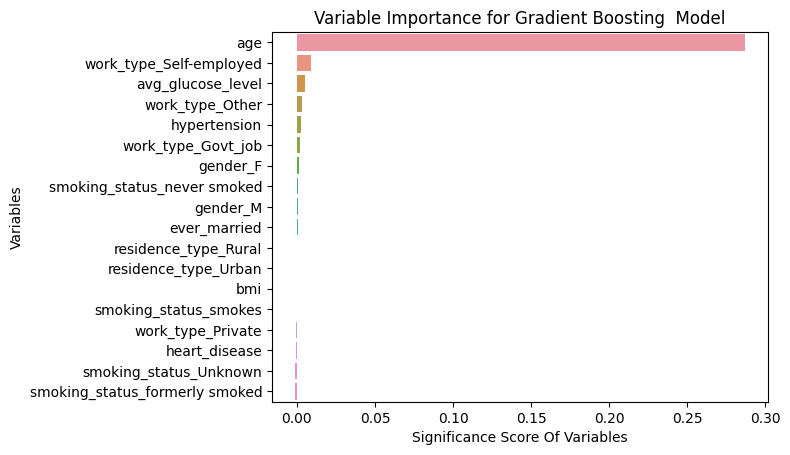

In [18]:
X_train2 = pd.read_csv('../data/x_y_data/K3/X_resampled.csv')
y_train2 = pd.read_csv('../data/x_y_data/K3/y_resampled.csv')


lg_tuned = lg1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(lg_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


#####  The level of 'age' is very high, compared to 'KNN'

In [19]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df

,0
age,0.287316
work_type_Self-employed,0.008903
avg_glucose_level,0.005458
work_type_Other,0.003239
hypertension,0.002903
work_type_Govt_job,0.002077
gender_F,0.001097
smoking_status_never smoked,0.001032
gender_M,0.000839
ever_married,0.000594


In [20]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
age,0.287316
work_type_Self-employed,0.008903


In [21]:
feature_importances_df.to_csv('../data/score/K3/Significant_Score/LG_Significance_Score.csv', index=False)

### the classification report

In [22]:
from sklearn.metrics import confusion_matrix


y_pred = lg1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[724, 248],
       [ 13,  35]])

In [23]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    737
1    283
Name: count, dtype: int64

In [24]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

stroke
0         972
1          48
Name: count, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = lg1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.744118
1,Precision,0.123675
2,Recall,0.729167
3,F1-Score,0.211480
4,Kappa,0.142476


In [26]:
metrics_df.to_csv('../data/metrics/K3_lg_metrics.csv', index=False)

[CV 4/5; 1/4] START penalty=l1..................................................
[CV 4/5; 1/4] END ...penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 2/4] START penalty=l2..................................................
[CV 4/5; 2/4] END penalty=l2;, score=(train=0.790, test=0.779) total time=   0.1s
[CV 3/5; 1/4] START penalty=l1..................................................
[CV 3/5; 1/4] END ...penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 3/4] START penalty=elasticnet..........................................
[CV 2/5; 3/4] END penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 3/4] START penalty=elasticnet..........................................
[CV 4/5; 3/4] END penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 2/4] START penalty=l2..................................................
[CV 3/5; 2/4] END penalty=l2;, score=(train=0.786, test=0.789) total time=   0.1s
[CV 5/5; 3/4] ST